# Intro To Raster Data In Python
Import `rioxarray`, a package to work with raster data. It is based on the `rasterio` package for working with rasters and `xarray` for working with multi-dimensional arrays

In [1]:
import rioxarray

The GeoTIFF format contains tags with metadata about the raster data. We can use `rioxarray.open_rasterio()` to read the geotiff file and inspect this metadata.

## Opening a Raster

In [26]:
surface_HARV = rioxarray.open_rasterio("data/NEON-GEO-PYTHON-DATASETS/NEON-DS-Airborne-Remote-Sensing/HARV/DSM/HARV_dsmCrop.tif")
surface_HARV

<xarray.DataArray (band: 1, y: 1367, x: 1697)>
[2319799 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.315e+05 7.315e+05 ... 7.331e+05 7.331e+05
  * y            (y) float64 4.714e+06 4.714e+06 ... 4.712e+06 4.712e+06
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  416.06997680664
    STATISTICS_MEAN:     359.85311802914
    STATISTICS_MINIMUM:  305.07000732422
    STATISTICS_STDDEV:   17.83169335933
    _FillValue:          -9999.0
    scale_factor:        1.0
    add_offset:          0.0

The first call to `rioxarray.open_rasterio()` opens the file and returns a `xarray.DataArray`, which acts like a numpy array. Calling the variable of the DataArray will also print out its metadata. 

The output indicates that we are looking at an `xarray.DataArray`, with 1 band, 1367 rows, and 1697 columns. We can also see the number of pixels andthe type of pixels (floating point). We can also see the coordinates of the band and spatial coordinates like x and y. The `transform` represents the conversion between array (non-spatial) and spatial coordinates.

The `DataArray` also has other attributes like below.

In [3]:
print(surface_HARV.rio.crs)
print(surface_HARV.rio.nodata)
print(surface_HARV.rio.bounds())
print(surface_HARV.rio.width)
print(surface_HARV.rio.height)

EPSG:32618
-9999.0
(731453.0, 4712471.0, 733150.0, 4713838.0)
1697
1367


The Coordinate Reference System, `surface_HARV.rio.crs` is reported as `EPSG: 32618`. The `nodata` value is encoded as -9999.0 and the bounding box corners are represented as a tple. The height and width match the metadata of `DataArray`.

We can examine the raw values of the array with `.values`.

In [4]:
surface_HARV.values

array([[[408.76998901, 408.22998047, 406.52999878, ..., 345.05999756,
         345.13998413, 344.97000122],
        [407.04998779, 406.61999512, 404.97998047, ..., 345.20999146,
         344.97000122, 345.13998413],
        [407.05999756, 406.02999878, 403.54998779, ..., 345.07000732,
         345.08999634, 345.17999268],
        ...,
        [367.91000366, 370.19000244, 370.58999634, ..., 311.38998413,
         310.44998169, 309.38998413],
        [370.75997925, 371.50997925, 363.41000366, ..., 314.70999146,
         309.25      , 312.01998901],
        [369.95999146, 372.6000061 , 372.42999268, ..., 316.38998413,
         309.86999512, 311.20999146]]])

Since our raster is loaded as a `DataArray` type, we can plot this in one line similar to a pandas `DataFrame` with `DataArray.plot()`.

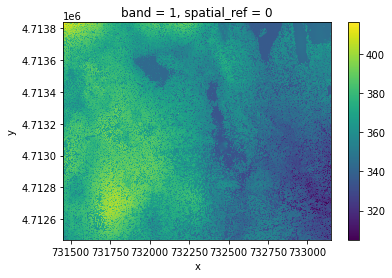

In [5]:
surface_HARV.plot()

The `rioxarray` allows us to plot this raster with spatial coordinates on the x and y axis. The map shows the elevation of Harvard Forest. We can see that the maximum is around 400, but we do not know whether this is in meters or feet. We can see from the metadata what the units are.

## Viewing Raster CRS

To view the crs data, we can use the following line.

In [9]:
print(surface_HARV.rio.crs)

EPSG:32618


To print just the code number we can use the `.to_epsg()` method:

In [12]:
print(surface_HARV.rio.crs.to_epsg())

32618


To see the information about the CRS, we can use `pyproj`, a library for representing and working with coordinate reference systems.


In [14]:
from pyproj import CRS
epsg = surface_HARV.rio.crs.to_epsg()
crs = CRS(epsg)
crs

<Derived Projected CRS: EPSG:32618>
Name: WGS 84 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Canada - Nunavut; Ontario; Quebec. Colombia. Cuba. Ecuador. Greenland. Haiti. Jamaica. Panama. Turks and Caicos Islands. United States (USA). Venezuela.
- bounds: (-78.0, 0.0, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The `CRS` class allows us to create a `CRS` object with ways to access specific information about a CRS. A particularly useful attribute is `area_of_use`, which shows the geographic bounds that the CRS is intended to be used.

In [15]:
crs.area_of_use

AreaOfUse(west=-78.0, south=0.0, east=-72.0, north=84.0, name='Between 78°W and 72°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Canada - Nunavut; Ontario; Quebec. Colombia. Cuba. Ecuador. Greenland. Haiti. Jamaica. Panama. Turks and Caicos Islands. United States (USA). Venezuela.')

We can use `help(crs)` to learn more about what information we can extract. Let's try to find what units the CRS is in.

In [19]:
crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

## Understanding pyproj CRS Summary

The CRS summary contains all the CRS elements Python might need. Our UTM projection is summarized as follows

In [20]:
crs

<Derived Projected CRS: EPSG:32618>
Name: WGS 84 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Canada - Nunavut; Ontario; Quebec. Colombia. Cuba. Ecuador. Greenland. Haiti. Jamaica. Panama. Turks and Caicos Islands. United States (USA). Venezuela.
- bounds: (-78.0, 0.0, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

- The name of the projection is UTM zone 18N. The datum is WGS84
- Axis info: the CRS shows a Cartesian system with two axis, an easting and northing, in meters
- Area of use: the projection is used for a particular range of longitudes in the northern hemisphere
- Coordinate operation: the operation to project the coordinates on a cartesian (x, y) plane. Transverse mercator is accurate for areas with longitudinal widths of a few degrees
- Datum: details about the datum
- The zone is unique to the UTM projection. Not all CRSs will have a zone. 

## Calculate Raster Min Max Values

In [21]:
print(surface_HARV.min())
print(surface_HARV.max())
print(surface_HARV.mean())
print(surface_HARV.std())

<xarray.DataArray ()>
array(305.07000732)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(416.06997681)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(359.85311803)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(17.83168952)
Coordinates:
    spatial_ref  int64 0


The information above includes the min, max, mean, and standard deviation of the data, along with the data type. If we want to see specific quantiles, we can use the xarray's `.quantile()` method. For example, for the 25% and 75% quartiles:x

In [23]:
print(surface_HARV.quantile([0.25, 0.75]))

<xarray.DataArray (quantile: 2)>
array([345.58999634, 374.27999878])
Coordinates:
  * quantile  (quantile) float64 0.25 0.75


We can also use `numpy.percentile(string surfaceName, int percentile)` to get the values individually. Neither require an argument specifying the axis or dimension to compute the quantile. This is because `axis=None` is the default for most numpy functions, and `dim=None` the default for most xarray methods.

## Raster Bands
A dataset can contain one or more bands. We can view the number of bands in a raster by looking at the `.shape` attribute of the `DataArray`. The band number comes first when GeoTiffs are read with the `.open_rasterio()` function.

In [24]:
rgb_HARV = rioxarray.open_rasterio("data/NEON-GEO-PYTHON-DATASETS/NEON-DS-Airborne-Remote-Sensing/HARV/RGB_Imagery/HARV_RGB_Ortho.tif")
rgb_HARV.shape

(3, 2317, 3073)

You should examine the shape of the raster array to make sure it is what you expect. 

## Dealing With Missing Data